In [117]:
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Risks_Regulations/Stocks')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/LEARN/Finance/quantitative finance/Risks_Regulations/Stocks


# Data

                 Close        High         Low        Open    Volume
Date                                                                
2014-01-01  178.881805  180.242532  177.952932  179.403279   3102869
2014-01-02  175.280380  182.189909  174.384097  178.629229  11321513
2014-01-03  173.846344  175.182618  170.293802  174.041900  15567502
2014-01-06  169.609314  174.204802  168.672290  173.715919  14802265
2014-01-07  171.108582  172.607821  166.847161  170.301932  18566515
                  Close         High          Low         Open   Volume
Date                                                                   
2025-07-08  1442.000000  1445.000000  1430.000000  1432.000000  5315847
2025-07-09  1431.900024  1438.699951  1426.599976  1436.199951  8827347
2025-07-10  1424.099976  1439.000000  1422.099976  1436.800049  7795964
2025-07-11  1421.900024  1428.000000  1414.599976  1422.000000  7158015
2025-07-14  1423.000000  1424.900024  1416.099976  1424.900024  5845352
<class 'panda

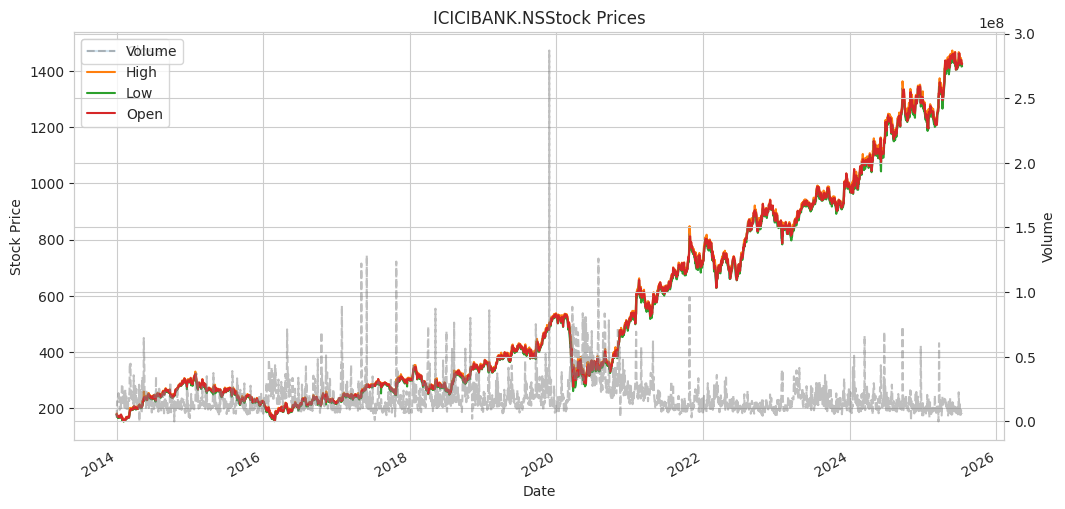

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2844 entries, 2014-01-01 to 2025-07-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2844 non-null   float64
dtypes: float64(1)
memory usage: 44.4 KB
             Close    LogReturn
count  2844.000000  2843.000000
mean    548.510897     0.000729
std     352.948212     0.019308
min     156.124359    -0.196597
25%     265.532867    -0.009147
50%     376.972671     0.000283
75%     825.748306     0.009947
max    1462.199951     0.137043


,Close,LogReturn
Date,,
2014-01-01,178.881805,NaN
2014-01-02,175.280380,-0.020338
2014-01-03,173.846344,-0.008215
2014-01-06,169.609314,-0.024674
2014-01-07,171.108582,0.008801


In [118]:
%run analytical.ipynb
%run empirical.ipynb
%run monte_carlo.ipynb
%run stock_option_data.ipynb
%run risk_analysis.ipynb

predictor = StockPredictor('ICICIBANK.NS', '2014-01-01', date.today(), 'Close', nfuture = 252) #nfuture manages the the period of forecasting in days
df = predictor.data_initiation()
print (df.describe())
df.head()

# VaR : Analytical

/tmp/ipython-input-767882248.py:122: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breaches_series = self.data['Breach'].fillna(False).astype(int)


   Actual Breaches  Expected Breaches  Breach Ratio  \
0              126              140.6      0.044808   

   Number of Continuous Breaches  Conditional Probability of Breaches  \
0                             17                             0.603175   

   kupiec_LR  kupiec_p_value  binomial_test_p_value  
0   1.651106        0.198808               0.225488  
---------------------------------------------------------------------------------
                 Close  LogReturn   VaR 10D  ModVaR 10D  CVaR 10D  Shapiro_p  \
Date                                                                           
2014-01-01  178.881805        NaN       NaN         NaN       NaN        NaN   
2014-01-02  175.280380  -0.020338       NaN         NaN       NaN        NaN   
2014-01-03  173.846344  -0.008215       NaN         NaN       NaN        NaN   
2014-01-06  169.609314  -0.024674       NaN         NaN       NaN        NaN   
2014-01-07  171.108582   0.008801       NaN         NaN       NaN       

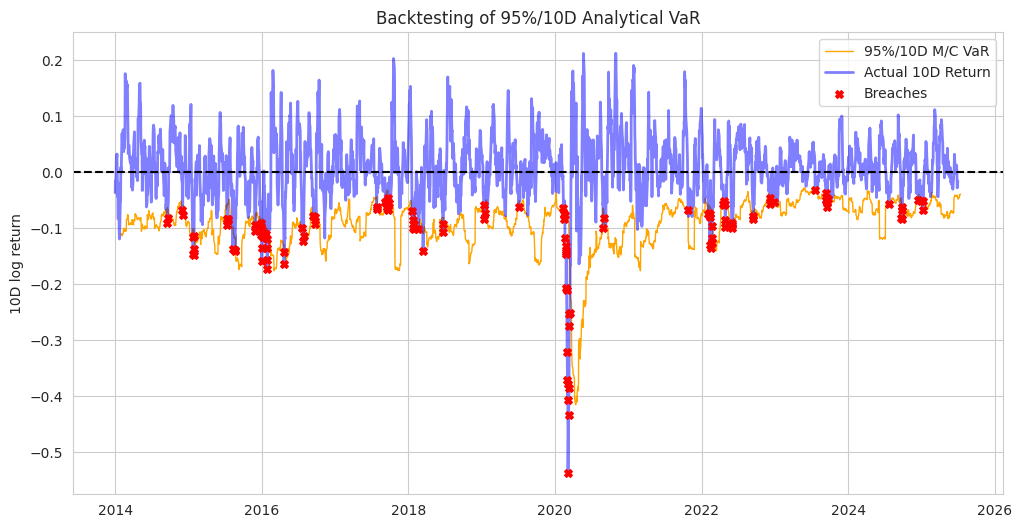

In [119]:
confidence = 0.95
lookback = 21
forecast = 10

predictor.run_analytical(df, 1-confidence, lookback, forecast, 'var', 'norm')

#options available on risk metrics - var | cvar
#option avaialble on distribution - norm | t            #for nomral distribution, if shapiro test fails var --> mvar, pareto distribution WIP




# VaR : Historical

/tmp/ipython-input-333340186.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breaches_series = self.data['Breach'].fillna(False).astype(int)
/tmp/ipython-input-333340186.py:101: RuntimeWarning: divide by zero encountered in log
  np.log((1 - p0)**(total_obs - num_breaches) * p0**num_breaches)
/tmp/ipython-input-333340186.py:102: RuntimeWarning: divide by zero encountered in log
  - np.log((1 - p_hat)**(total_obs - num_breaches) * p_hat**num_breaches)
/tmp/ipython-input-333340186.py:101: RuntimeWarning: invalid value encountered in scalar subtract
  np.log((1 - p0)**(total_obs - num_breaches) * p0**num_breaches)


   Actual Breaches  Expected Breaches  Breach Ratio  \
0              252              140.6      0.089616   

   Number of Continuous Breaches  Conditional Probability of Breaches  \
0                             18                             0.654762   

   kupiec_LR  kupiec_p_value  binomial_test_p_value  
0        NaN             NaN           2.447702e-18  
---------------------------------------------------------------------------------
                 Close  LogReturn   VaR 10D  ModVaR 10D  CVaR 10D  Shapiro_p  \
Date                                                                           
2014-01-01  178.881805        NaN       NaN         NaN       NaN        NaN   
2014-01-02  175.280380  -0.020338       NaN         NaN       NaN        NaN   
2014-01-03  173.846344  -0.008215       NaN         NaN       NaN        NaN   
2014-01-06  169.609314  -0.024674       NaN         NaN       NaN        NaN   
2014-01-07  171.108582   0.008801       NaN         NaN       NaN       

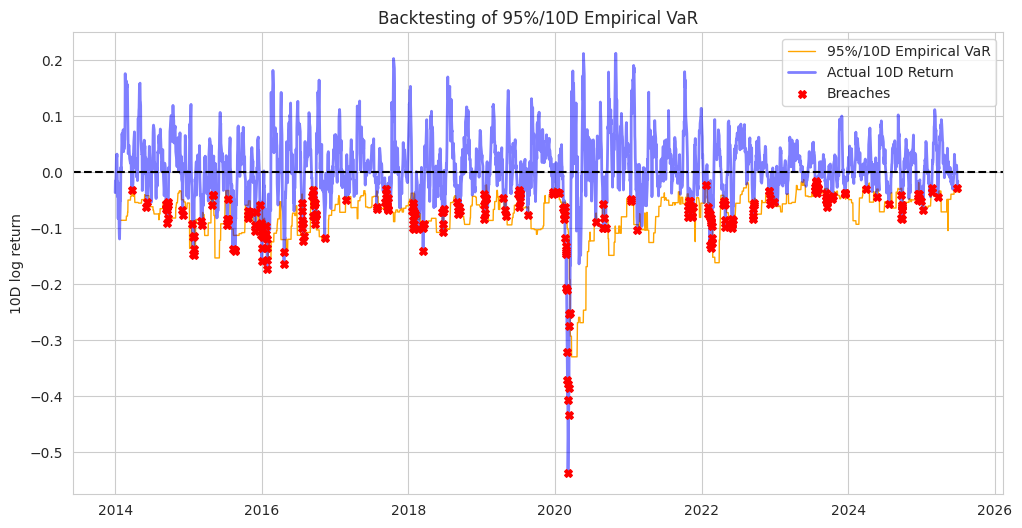

In [120]:
confidence = 0.95
lookback = 21
forecast = 10

predictor.run_empirical(df, 1-confidence, lookback, forecast, 'var')
#options available on risk metrics - var | cvar

# VaR : Monte Carlo

/tmp/ipython-input-4086954006.py:88: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breaches_series = self.data['Breach'].fillna(False).astype(int)
/tmp/ipython-input-4086954006.py:105: RuntimeWarning: divide by zero encountered in log
  np.log((1 - p0)**(total_obs - num_breaches) * p0**num_breaches)
/tmp/ipython-input-4086954006.py:106: RuntimeWarning: divide by zero encountered in log
  - np.log((1 - p_hat)**(total_obs - num_breaches) * p_hat**num_breaches)
/tmp/ipython-input-4086954006.py:105: RuntimeWarning: invalid value encountered in scalar subtract
  np.log((1 - p0)**(total_obs - num_breaches) * p0**num_breaches)


   Actual Breaches  Expected Breaches  Breach Ratio  \
0              278              140.6      0.098862   

   Number of Continuous Breaches  Conditional Probability of Breaches  \
0                             17                             0.719424   

   kupiec_LR  kupiec_p_value  binomial_test_p_value  
0        NaN             NaN           3.951735e-26  
---------------------------------------------------------------------------------
                 Close  LogReturn   VaR 10D  ModVaR 10D  CVaR 10D  Shapiro_p  \
Date                                                                           
2014-01-01  178.881805        NaN       NaN         NaN       NaN        NaN   
2014-01-02  175.280380  -0.020338       NaN         NaN       NaN        NaN   
2014-01-03  173.846344  -0.008215       NaN         NaN       NaN        NaN   
2014-01-06  169.609314  -0.024674       NaN         NaN       NaN        NaN   
2014-01-07  171.108582   0.008801       NaN         NaN       NaN       

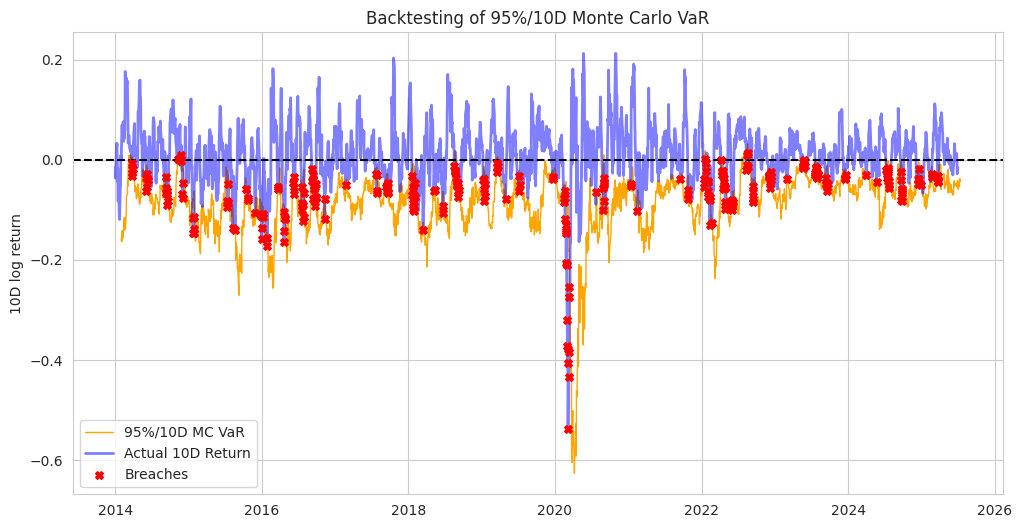

In [122]:
confidence = 0.95
lookback = 21
forecast = 10
nsims_mc = 500

predictor.run_monte_carlo(df, 1-confidence, lookback, forecast, 'var', nsims_mc)
#options available on risk metrics - var | cvar


